In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)
val_idg = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('x-rays/chest_xray/train', 
                                      class_mode='categorical',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE,
                                      batch_size = 32,
                                      shuffle = True,
                                      seed = 42
                                     )
test = test_idg.flow_from_directory('x-rays/chest_xray/test', 
                                    class_mode='categorical',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE,
                                    batch_size = 32,
                                    shuffle = True,
                                    seed = 42
                                   )

Found 5232 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [4]:
trainX, trainY = next(train)
testX, testY = next(test)

In [5]:
print(len(trainX), len(trainY))

32 32


In [6]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))

Train X=(32, 224, 224, 1) Y=(32, 3)
Test X=(32, 224, 224, 1) Y=(32, 3)


In [7]:
labels = []
for label in trainY:
    if (label == [0., 0., 1.]).all():
        lables = ['Bacteria']
    elif (label == [0., 1., 0.]).all():
        lables = ['Virus']
    elif (label == [1., 0., 0.]).all():
        lables = ['Normal']
    print(label, lables)

[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[0. 1. 0.] ['Virus']
[1. 0. 0.] ['Normal']
[0. 0. 1.] ['Bacteria']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[0. 0. 1.] ['Bacteria']
[0. 1. 0.] ['Virus']
[1. 0. 0.] ['Normal']
[0. 1. 0.] ['Virus']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[0. 1. 0.] ['Virus']
[0. 0. 1.] ['Bacteria']
[0. 1. 0.] ['Virus']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[0. 0. 1.] ['Bacteria']
[0. 0. 1.] ['Bacteria']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[1. 0. 0.] ['Normal']
[0. 1. 0.] ['Virus']
[0. 0. 1.] ['Bacteria']
[0. 1. 0.] ['Virus']


In [8]:
print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX .shape[0], "test samples")

x_train shape: (32, 224, 224, 1)
32 train samples
32 test samples


In [9]:
model = Sequential(name = "Sequential")
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224,1) , name="FirstConvolution"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FirstMaxPool"))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="SecondConvolution"))
model.add(Dropout(0.1, name="Droupout1"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="SecondMaxPool"))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ThirdConvolution"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ThirdMaxPool"))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ForthConvolution"))
model.add(Dropout(0.2 , name="Droupout2"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ForthMaxPool"))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="FifthConvolution"))
model.add(Dropout(0.2 , name="Droupout3"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FifthMaxPool"))
model.add(Flatten(name="Flatten"))
model.add(Dense(units = 128 , activation = 'relu' , name="Dense1"))
model.add(Dense(units = 64 , activation = 'relu' , name="Dense2"))
model.add(Dropout(0.2 , name="Droupout4"))
model.add(Dense(units = 32 , activation = 'relu' , name="Dense3"))
model.add(Dense(units = 3 , activation = 'softmax' , name="Dense4"))
model.compile(optimizer = "Adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConvolution (Conv2D)    (None, 224, 224, 16)      160       
_________________________________________________________________
FirstMaxPool (MaxPooling2D)  (None, 112, 112, 16)      0         
_________________________________________________________________
SecondConvolution (Conv2D)   (None, 112, 112, 32)      4640      
_________________________________________________________________
Droupout1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
SecondMaxPool (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
ThirdConvolution (Conv2D)    (None, 56, 56, 64)        18496     
_________________________________________________________________
ThirdMaxPool (MaxPooling2D)  (None, 28, 28, 64)        0

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1, factor=0.3, min_lr=0.000001)

In [11]:
history = model.fit(train, epochs = 20 , callbacks = [learning_rate_reduction])

Epoch 1/20
164/164 [==============================] - 81s 493ms/step - loss: 0.9078 - accuracy: 0.5726
Epoch 2/20
164/164 [==============================] - 78s 477ms/step - loss: 0.7487 - accuracy: 0.6701
Epoch 3/20
164/164 [==============================] - 79s 481ms/step - loss: 0.7076 - accuracy: 0.6902
Epoch 4/20
164/164 [==============================] - 76s 461ms/step - loss: 0.6544 - accuracy: 0.7150
Epoch 5/20
164/164 [==============================] - 75s 459ms/step - loss: 0.6325 - accuracy: 0.7259
Epoch 6/20
164/164 [==============================] - 75s 457ms/step - loss: 0.6326 - accuracy: 0.7336
Epoch 7/20
164/164 [==============================] - 75s 458ms/step - loss: 0.5972 - accuracy: 0.7454
Epoch 8/20
164/164 [==============================] - 76s 464ms/step - loss: 0.5793 - accuracy: 0.7546
Epoch 9/20
164/164 [==============================] - 75s 458ms/step - loss: 0.5717 - accuracy: 0.7555
Epoch 10/20
164/164 [==============================] - 75s 457ms/step - l

In [13]:
print("Loss of the model is - " , model.evaluate(testX,testY)[0])
print("Accuracy of the model is - " , model.evaluate(testX,testY)[1]*100 , "%")

32/32 [==============================] - 0s 3ms/step
Loss of the model is -  0.712997317314148
32/32 [==============================] - 0s 3ms/step
Accuracy of the model is -  84.375 %


In [14]:
predictions = model.predict_classes(testX)
predictions = predictions.reshape(1,-1)[0]
print(predictions[:32])

[1 2 0 0 2 2 0 0 2 0 1 0 0 0 2 0 0 0 2 1 0 0 0 2 2 0 1 0 2 0 1 1]


In [15]:
rounded_labels=np.argmax(testY, axis=1)
print(rounded_labels[:32])

[1 2 0 0 2 2 0 0 2 0 1 0 0 0 2 0 0 1 1 1 0 0 0 2 1 0 1 2 2 1 1 1]


In [16]:
print('Confusion Matrix\n')
matrix = confusion_matrix(rounded_labels,predictions)
print(matrix)

Confusion Matrix

[[14  0  0]
 [ 2  6  2]
 [ 1  0  7]]


In [17]:
print(classification_report(rounded_labels, predictions, target_names = ['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        14
     Class 1       1.00      0.60      0.75        10
     Class 2       0.78      0.88      0.82         8

    accuracy                           0.84        32
   macro avg       0.87      0.83      0.83        32
weighted avg       0.87      0.84      0.84        32



In [18]:
correct = np.nonzero(predictions == rounded_labels)[0]
incorrect = np.nonzero(predictions != rounded_labels)[0]
print(len(correct), len(incorrect))

27 5


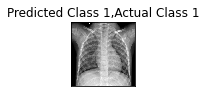

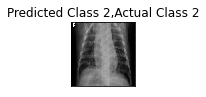

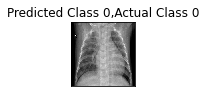

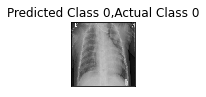

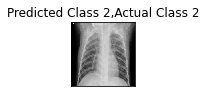

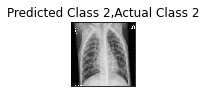

In [19]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], rounded_labels[c]))
    plt.show()
    i += 1

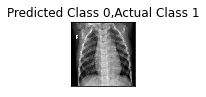

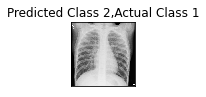

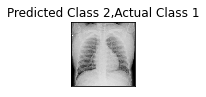

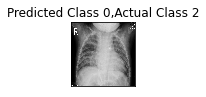

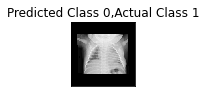

In [20]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], rounded_labels[c]))
    plt.show()
    i += 1